# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df = penguins.dropna().reset_index(drop=True)
df = pd.get_dummies(df, columns=["species", "island", "sex"], drop_first=True)

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,False,True,False
3,36.7,19.3,193.0,3450.0,False,False,False,True,False
4,39.3,20.6,190.0,3650.0,False,False,False,True,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_point, geom_line, theme_minimal, labs

y = df["bill_depth_mm"]

species_cols = ["species_Chinstrap", "species_Gentoo"]
island_cols  = ["island_Dream", "island_Torgersen"]
sex_cols     = ["sex_Male"]

all_features = (["bill_length_mm", "flipper_length_mm", "body_mass_g"] + species_cols + island_cols + sex_cols)

X_all = df[all_features].dropna()
y_all = y.loc[X_all.index]

X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.25, random_state=42
)

In [ ]:
#Model 1 - Bill Depth vs. Bill Length
Xtr1 = X_train_all[["bill_length_mm"]]
Xte1 = X_test_all[["bill_length_mm"]]
m1 = LinearRegression().fit(Xtr1, y_train)

rmse_tr_1 = np.sqrt(mean_squared_error(y_train, m1.predict(Xtr1)))
rmse_te_1 = np.sqrt(mean_squared_error(y_test,  m1.predict(Xte1)))

print("Train RMSE:", rmse_tr_1)
print("Test RMSE:", rmse_te_1)

Train RMSE: 1.908340373755344
Test RMSE: 1.931598165281976


In [ ]:
#Model 2 - Bill Depth vs. Bill Length, Flipper Length and Body Mass
Xtr2 = X_train_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]
Xte2 = X_test_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]
m2 = LinearRegression().fit(Xtr2, y_train)

rmse_tr_2 = np.sqrt(mean_squared_error(y_train, m2.predict(Xtr2)))
rmse_te_2 = np.sqrt(mean_squared_error(y_test,  m2.predict(Xte2)))

print("Train RMSE:", rmse_tr_2)
print("Test RMSE:", rmse_te_2)

Train RMSE: 1.5200669900400523
Test RMSE: 1.6654935053082578


In [ ]:
#Model 3 - Bill Depth vs. Bill Length, Flipper Length, Body Mass and Species
Xtr3 = X_train_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"] + species_cols]
Xte3 = X_test_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"] + species_cols]
m3 = LinearRegression().fit(Xtr3, y_train)

rmse_tr_3 = np.sqrt(mean_squared_error(y_train, m3.predict(Xtr3)))
rmse_te_3 = np.sqrt(mean_squared_error(y_test,  m3.predict(Xte3)))

print("Train RMSE:", rmse_tr_3)
print("Test RMSE:", rmse_te_3)

Model 3 (+ species):
Train RMSE: 0.7884411585845462
Test RMSE: 0.9714760212039025
----------------------------------------


In [ ]:
#Model 4 - Bill Depth vs. Bill Length, Flipper Length, Body Mass, Species, Island, and Sex
Xtr4 = X_train_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"] + species_cols + island_cols + sex_cols]
Xte4 = X_test_all[["bill_length_mm", "flipper_length_mm", "body_mass_g"] + species_cols + island_cols + sex_cols]
m4 = LinearRegression().fit(Xtr4, y_train)

rmse_tr_4 = np.sqrt(mean_squared_error(y_train, m4.predict(Xtr4)))
rmse_te_4 = np.sqrt(mean_squared_error(y_test,  m4.predict(Xte4)))

print("Train RMSE:", rmse_tr_4)
print("Test RMSE:", rmse_te_4)

Train RMSE: 0.733646025802672
Test RMSE: 0.9287927050704736


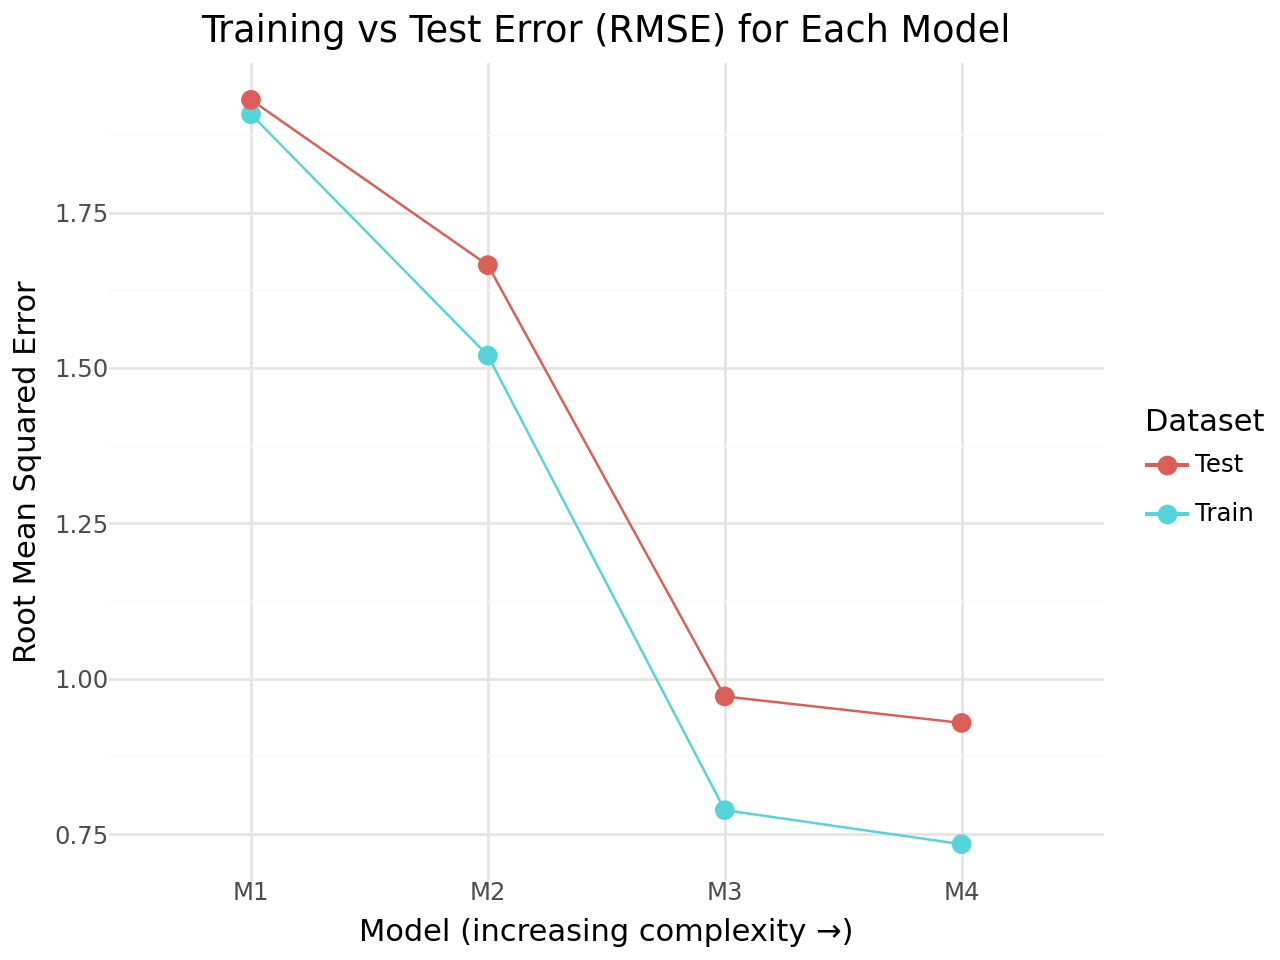

In [ ]:
#Re-creating the plot from figure 1
results = pd.DataFrame({
    "Model": ["M1","M1","M2","M2","M3","M3","M4","M4"],
    "Dataset": ["Train","Test"]*4,
    "RMSE": [rmse_tr_1, rmse_te_1,
             rmse_tr_2, rmse_te_2,
             rmse_tr_3, rmse_te_3,
             rmse_tr_4, rmse_te_4]
})

plot = (
    ggplot(results, aes(x="Model", y="RMSE", color="Dataset", group="Dataset"))
    + geom_point(size=3)
    + geom_line()
    + theme_minimal()
    + labs(
        title="Training vs Test Error (RMSE) for Each Model",
        x="Model (increasing complexity →)",
        y="Root Mean Squared Error"
    )
)
plot

Based on the plot above, we can see that model 4, which included all of the explanatory variables, resulted in the lowest mean squared error of all models for both the test data and the train data. Because of this, I would say that model 4 was the "best" of the 4 models.